In [37]:
# Sakshi Saini 
# 2017092
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
X, Y = loadlocal_mnist(
        images_path='C:/Users/saini/OneDrive/Documents/SML/Assignment2/Datasets/train-images.idx3-ubyte', 
        labels_path='C:/Users/saini/OneDrive/Documents/SML/Assignment2/Datasets/train-labels.idx1-ubyte')

In [3]:
Xt, Yt = loadlocal_mnist(
        images_path='C:/Users/saini/OneDrive/Documents/SML/Assignment2/Datasets/t10k-images.idx3-ubyte', 
        labels_path='C:/Users/saini/OneDrive/Documents/SML/Assignment2/Datasets/t10k-labels.idx1-ubyte')


In [4]:
def calc_mean(X):
    d = X.shape[1]
    n = X.shape[0]

    mu = np.zeros(shape = (d,))
    for i in range(n):
        xi = X[i,:]
        mu = mu + xi
    mu = mu/n

    return mu

In [5]:
def calculate_covariance(X):
    n = X.shape[0]
    d= X.shape[1]

    cov = np.zeros(shape=(d,d))
    mean = calc_mean(X)
    for i in range(n):

        xi = X[i,:]
        xi, mean = xi.reshape(d,1), mean.reshape(d,1)
        cov += (xi-mean)*((xi-mean).T)

    cov = cov/(n-1)
    return cov

In [6]:
# a part Compute Global Mean and Covariance of the data
mean = calc_mean(X)
cov = np.cov(X)

In [7]:
def pca(X, n_comp):
    
    data = X.T
    cov = np.cov(data)
    eigenValues, eigenVectors = np.linalg.eigh(cov)
        
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]

    W = eigenVectors[:, :n_comp]
    Z = np.dot(W.T,data)
    
    return (W, Z)

In [8]:
def fda(X, Y, n_comp):
    
    data = X.T
    
    d = X.shape[1]
    sw = np.zeros((d,d)) 

    for i in range(10):

        sub_class = X[Y==i]
        subCov = np.cov(data)
        sw += subCov
        
    m = calc_mean(X).reshape(d,1)
    sb = np.zeros((d,d))
    
    for i in range(10):

        sub_class = X[Y==i]
        ni = sub_class.shape[0]

        subMean = calc_mean(sub_class).reshape(d,1)
        sb += (m - subMean).dot((m-subMean).T) 

    invsw = np.linalg.pinv(sw)
    r = np.dot(invsw, sb)
        
    eigenValues, eigenVectors = np.linalg.eigh(r)
    
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    W = eigenVectors[:, :n_comp]
    
    Z = np.dot(W.T, data)
    return ( W, Z )

In [9]:
def plot_pca(X):
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
        
    ax.scatter( X[0, :]
               ,X[1, :]
               , c = 'b'
               , s = 50)
    ax.grid()

In [10]:
def plot_fda(X, Y):
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 

    label = [0,1,2,3,4,5,6,7,8,9]
    colors = ['r', 'g', 'b', 'c', 'm','y','k','gray', 'orange','darkred']
    
    for i in range(len(label)):
        sub_class = X[Y==i]
        
        ax.scatter(  sub_class[:,0]
                   , sub_class[:,1]
                   , c = colors[i]
                   , s = 50)
        
    ax.legend(label)
    ax.grid()

In [11]:
# b part Implement PCA and FDA

WPca, ZPca = pca(X,2)
WFda, ZFda = fda(X,Y,9)

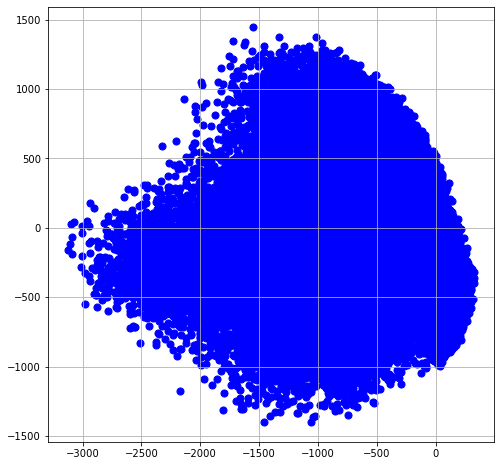

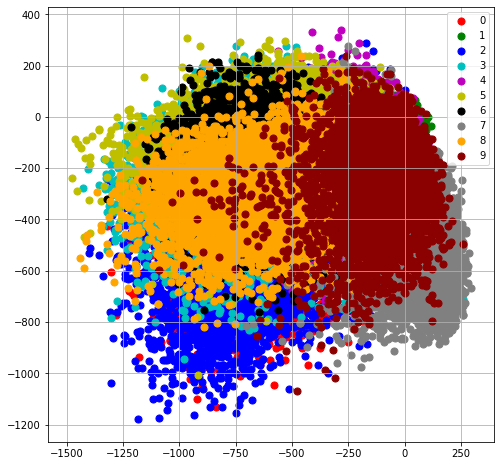

In [12]:
# c part visuliase the 2d scatter plot PCA and FDA

plot_pca(ZPca)
plot_fda(ZFda.T,Y)

In [13]:
def discriminant_function(xt, X, Y, inv_cov):
    
    mini= 1000000000
    pred_class = 0
    
    for i in range(10):
        sub_class = X[Y==i]
        mean = calc_mean(sub_class)
        d= mean.shape[0]
        
        mean = mean.reshape((1,d))
        xt = xt.reshape((1,d))
        dist = ( xt-mean ).dot ((inv_cov).dot((xt-mean).T))
        distance= dist[0][0]
    
        if( dist < mini):
            mini = distance
            pred_class = i
            
    return pred_class


In [14]:
def pca_eigen_energy(X , eng, cov):
    
    np.set_printoptions(precision=4)
    d = X.shape[1]    
    eigenValues, eigenVectors = np.linalg.eigh(cov)
    
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    n_comp=0
    req = 0

    sumEig = 0
    for i in range(d):
        sumEig += eigenValues[i]
        
    for i in range(d):
        req += eigenValues[i]
        if( req/sumEig > eng):
            n_comp = i
            break

    W = eigenVectors[:, :n_comp]
    
    X = np.transpose(X)
    W = np.transpose(W)
    Z = np.dot(W,X)
    
    return (W, Z)

In [28]:
def accuracy( W, Z, Y, inv_cov):
    
    n_test = 200
    score =0
    
    for i in range(n_test):

        xt = Xt[i,:]
        xt = xt.reshape(784,1)
        yt = np.dot(W, xt)

        out= discriminant_function(yt, Z.T, Y, inv_cov)
        if( out == Yt[i] ):
            score +=1

    return (score/n_test)


In [16]:
# d part implement discriminant function
# discriminant_function -- implemented

In [29]:
# e part Apply PCA with 95% eigen energy on MNIST and then LDA for classification
# and report the accuracy on test data.

data = X.T
cov = np.cov(data)
W, Z = pca_eigen_energy(X, 0.95, cov)

cov = np.cov(Z)
inv_cov = np.linalg.inv(cov)
acc= accuracy(W, Z, Y , inv_cov )

print(W.shape)
print(acc)

(153, 784)
0.915


In [30]:
def reconstruction(w, proj):

    u = (w.T).dot(w)
    inv = np.linalg.pinv(u)    
    a = (inv).dot(w.T)
    recon = (a).dot(proj)

    for i in range(5):
        pixels = recon[:,i]
        pixels = pixels.reshape((28,28))

        plt.imshow(pixels, cmap='gray')
        plt.show()

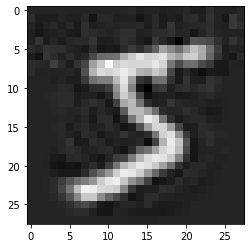

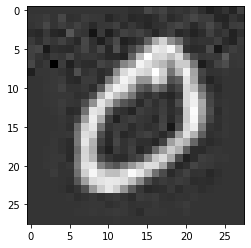

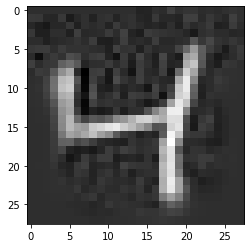

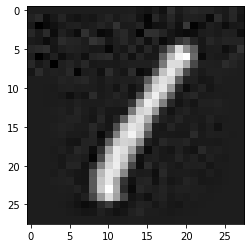

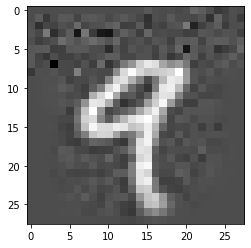

In [31]:
# f part Visualize and analyze the eigenvectors obtained using PCA (only for
# eigenvectors obtained in part(e). I.e., Display eigenvectors by converting
# them into image form).

data = X.T
cov = np.cov(data)
W, Z = pca_eigen_energy(X, 0.95, cov)

reconstruction(W, Z)

In [32]:
# g part calculate accuracy with 70% eigen energy

data = X.T
cov = np.cov(data)
W, Z = pca_eigen_energy(X, 0.70, cov)

cov = np.cov(Z)
inv_cov = np.linalg.inv(cov)
acc= accuracy(W, Z, Y , inv_cov )

print(acc)

0.85


In [33]:
# 90% eigen energy

data = X.T
cov = np.cov(data)
W, Z = pca_eigen_energy(X, 0.90, cov)

cov = np.cov(Z)
inv_cov = np.linalg.inv(cov)
acc= accuracy(W, Z, Y , inv_cov )

print(acc)

0.89


In [34]:
# 99% eigen energy

data = X.T
cov = np.cov(data)
W, Z = pca_eigen_energy(X, 0.99, cov)

cov = np.cov(Z)
inv_cov = np.linalg.inv(cov)
acc= accuracy(W, Z, Y , inv_cov )

print(acc)

0.905


In [35]:
# h part Apply FDA on MNIST and then LDA for classification and report the accuracy
# on test data.

W, Z = fda(X, Y, 9)

cov = np.cov(Z)
inv_cov = np.linalg.inv(cov)
acc= accuracy(W.T, Z, Y , inv_cov )
print(acc)

0.785


In [36]:
# i part Perform PCA then FDA. Classify the transformed datasets using LDA.
# Analyze the results on Accuracy.

data = X.T
cov = np.cov(data)
WPca, ZPca = pca_eigen_energy(X, 0.95, cov)

data = ZPca.T
WFda, ZFda = fda(data, Y, 9)

cov = np.cov(ZFda)
inv_cov = np.linalg.inv(cov)

score =0
for i in range(200):
    
    xt = Xt[i, :]
    xt = xt.reshape(784,1)
    yPca = np.dot(WPca, xt)
    yFda = np.dot( yPca.T, WFda)

    out= discriminant_function(yFda, ZFda.T, Y, inv_cov)
    
    if( out == Yt[i] ):
        score += 1

acc = score/200
print(acc)

0.87
